In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xC = np.array([2, 1])      # Centro dos dados (Média)
sig = np.array([2, 0.5])   # Eixos Principais

In [4]:
theta = np.pi/3 # ângulo para rotacionar a nuvem de pontos

R = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

numPoints = 10000
X = R @ np.diag(sig) @ np.random.randn(2, numPoints) + np.diag(xC) @ np.ones((2, numPoints))

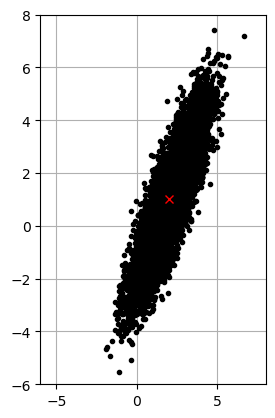

In [5]:
fig = plt.figure()
ax1 = fig.add_subplot(121)
ax1.plot(X[0,:],X[1,:], '.', color='k')
ax1.plot(2, 1, 'x', color='r')
ax1.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

plt.show()

In [6]:
Xavg = np.mean(X, 1) #computa a média das linhas
B = X - np.tile(Xavg,(numPoints,1)).T  #recentraliza os dados pra origem usando a média
U,S,V = np.linalg.svd(B/np.sqrt(numPoints), full_matrices=False) 

In [7]:
U # Matriz de rotação, ou seja, indica a rotação dos pontos

array([[-0.49853244, -0.86687104],
       [-0.86687104,  0.49853244]])

In [8]:
S # Valores de sig, ou seja, indica o quanto foi esticado nas duas direções

array([1.98722491, 0.49495443])

In [11]:
V.shape

(2, 10000)

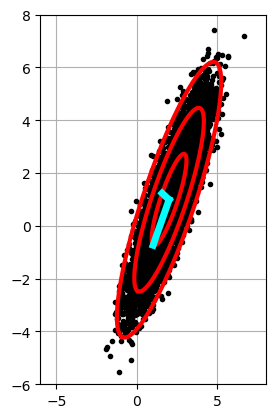

In [10]:
fig = plt.figure()

ax2 = fig.add_subplot(122)
ax2.plot(X[0,:],X[1,:], '.', color='k')   # Plota de novo para sobreposição do PCA
ax2.grid()
plt.xlim((-6, 8))
plt.ylim((-6,8))

theta = 2 * np.pi * np.arange(0,1,0.01)
Xstd =  U @ np.diag(S) @ np.array([np.cos(theta),np.sin(theta)])

ax2.plot(Xavg[0] + Xstd[0,:], Xavg[1] + Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 2*Xstd[0,:], Xavg[1] + 2*Xstd[1,:],'-',color='r',linewidth=3)
ax2.plot(Xavg[0] + 3*Xstd[0,:], Xavg[1] + 3*Xstd[1,:],'-',color='r',linewidth=3)

# Plot dos eixos do pc U[:,0]S[0] e U[:,1]S[1]
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,0]*S[0]]),
         np.array([Xavg[1], Xavg[1]+U[1,0]*S[0]]),'-',color='cyan',linewidth=5)
ax2.plot(np.array([Xavg[0], Xavg[0]+U[0,1]*S[1]]),
         np.array([Xavg[1], Xavg[1]+U[1,1]*S[1]]),'-',color='cyan',linewidth=5)

plt.show()